Import the necessary libraries

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [380]:
#Change pandas display options to display all columns of the DataFrame

pd.set_option("display.max_columns",None)
#Change pandas display options to display all rows of the DataFrame
pd.set_option("display.max_rows",None)
# Change pandas display options to show all columns at once
pd.set_option("display.expand_frame_repr",False)
# Change pandas display options to show whole numbers (not scientific notation)
pd.set_option('display.float_format', '{:,.0f}'.format)

In [382]:
#Load the data

df = pd.read_csv('Downloads/financial_transactions.csv')
print(df.head(2))

   transaction_id        date  customer_id  amount    type                           description
0               1  2020-10-26          926   6,478  credit    Expect series shake art again our.
1               2  2020-01-08          466   1,256  credit  Each left similar likely coach take.


Data Exploration 

In [385]:
print(df.describe())


       transaction_id  customer_id  amount
count         100,000      100,000 100,000
mean           50,000          500   5,009
std            28,868          289   2,888
min                 1            1       1
25%            25,001          249   2,515
50%            50,000          499   5,006
75%            75,000          750   7,514
max           100,000        1,000  10,000


In [387]:
#Check to understand the features of each column better

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  100000 non-null  int64  
 1   date            100000 non-null  object 
 2   customer_id     100000 non-null  int64  
 3   amount          100000 non-null  float64
 4   type            100000 non-null  object 
 5   description     100000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB
None


Data Cleaning


In [390]:
#Check for null values

print(df[df.isna()].count())

transaction_id    0
date              0
customer_id       0
amount            0
type              0
description       0
dtype: int64


In [392]:
#Check for duplicates

df.duplicated().any()

False

Data Transformation and Processing

In [395]:
#Convert the 'date' column to datetime datatype

df['date'] = pd.to_datetime(df['date'])


In [397]:
#Extract the year from the 'date' column

df['year'] = df['date'].dt.year
print(df.head())

   transaction_id       date  customer_id  amount    type                                        description  year
0               1 2020-10-26          926   6,478  credit                 Expect series shake art again our.  2020
1               2 2020-01-08          466   1,256  credit               Each left similar likely coach take.  2020
2               3 2019-09-02          110   7,970   debit  Direction wife job pull determine leader move ...  2019
3               4 2020-12-02          142   2,927  credit                    Agree reveal buy black already.  2020
4               5 2020-12-02          944   4,662   debit       Child relationship show college whom speech.  2020


In [399]:
#Extract the month from the 'date' column

df['month'] = df['date'].dt.month
print(df.head())

   transaction_id       date  customer_id  amount    type                                        description  year  month
0               1 2020-10-26          926   6,478  credit                 Expect series shake art again our.  2020     10
1               2 2020-01-08          466   1,256  credit               Each left similar likely coach take.  2020      1
2               3 2019-09-02          110   7,970   debit  Direction wife job pull determine leader move ...  2019      9
3               4 2020-12-02          142   2,927  credit                    Agree reveal buy black already.  2020     12
4               5 2020-12-02          944   4,662   debit       Child relationship show college whom speech.  2020     12


In [401]:
#Reorder columns: move column 'year' from 7th position (index 6) to 3rd position (index 2)

# Step 1: Pop the 'year' column from the 7th position (index 6)
year_col = df.pop('year')

# Step 2: Insert the 'year' column at the 3rd position (index 2)
df.insert(2, 'year', year_col)

# Display the DataFrame with reordered columns
print(df.head())


   transaction_id       date  year  customer_id  amount    type                                        description  month
0               1 2020-10-26  2020          926   6,478  credit                 Expect series shake art again our.     10
1               2 2020-01-08  2020          466   1,256  credit               Each left similar likely coach take.      1
2               3 2019-09-02  2019          110   7,970   debit  Direction wife job pull determine leader move ...      9
3               4 2020-12-02  2020          142   2,927  credit                    Agree reveal buy black already.     12
4               5 2020-12-02  2020          944   4,662   debit       Child relationship show college whom speech.     12


In [403]:
#Reorder columns: move column 'month' from 8th position (index 7) to 4th position (index 3)

# Step 1: Pop the 'month' column from the 8th position (index 7)
month_col = df.pop('month')

# Step 2: Insert the 'month' column at the 4th position (index 3)
df.insert(3, 'month', month_col)

# Display the DataFrame with reordered columns
print(df.head())


   transaction_id       date  year  month  customer_id  amount    type                                        description
0               1 2020-10-26  2020     10          926   6,478  credit                 Expect series shake art again our.
1               2 2020-01-08  2020      1          466   1,256  credit               Each left similar likely coach take.
2               3 2019-09-02  2019      9          110   7,970   debit  Direction wife job pull determine leader move ...
3               4 2020-12-02  2020     12          142   2,927  credit                    Agree reveal buy black already.
4               5 2020-12-02  2020     12          944   4,662   debit       Child relationship show college whom speech.


In [405]:
#Convert the value in the month column to string type

df['month'] = df['date'].apply(lambda x : x.strftime("%B"))
print(df.head())

   transaction_id       date  year      month  customer_id  amount    type                                        description
0               1 2020-10-26  2020    October          926   6,478  credit                 Expect series shake art again our.
1               2 2020-01-08  2020    January          466   1,256  credit               Each left similar likely coach take.
2               3 2019-09-02  2019  September          110   7,970   debit  Direction wife job pull determine leader move ...
3               4 2020-12-02  2020   December          142   2,927  credit                    Agree reveal buy black already.
4               5 2020-12-02  2020   December          944   4,662   debit       Child relationship show college whom speech.


In [406]:
#Sum of transactions in each year (rounded up to 2 decimal places)

df_sum = df.groupby("year")["amount"].sum()
print(df_sum)

year
2018    77,213,542
2019   100,273,650
2020   100,936,349
2021    99,245,078
2022    99,084,987
2023    24,147,671
Name: amount, dtype: float64


In [409]:
#Transaction volume in each month of the year 2021

#Filter the data for the year 2021
df_2021 = df[df["year"]==2021]
print(df_2021.head())

#Count of total transactions in 2021
print("\nCount of total transactions in 2021")
print(df_2021['description'].count())
      
#Group year 2021 by 'month', then sum the 'amount' of transactions for each month
print("\nSum of monthly transactions in 2021")
df_2021_monthly = df_2021.groupby("month")["amount"].sum().sort_values(ascending=False)
print(df_2021_monthly)

#Group the monthly transactions by payment type
print("\nCount of transactions by payment type in 2021")
df_2021_type = df_2021.groupby("type")["month"].count()
print(df_2021_type)

#Group the sum of the monthly transactions by payment type
print("\nSum of transactions by payment type in 2021")
df_2021_type_amount = df_2021.groupby("type")["amount"].sum()
print(df_2021_type_amount)



    transaction_id       date  year      month  customer_id  amount      type                                  description
5                6 2021-04-25  2021      April          900   3,650    credit                          Century front item.
16              17 2021-06-05  2021       June          658   9,751  transfer  Listen operation enough those society open.
21              22 2021-03-19  2021      March          988   7,627     debit                   This pass civil education.
23              24 2021-09-02  2021  September            8   2,488    credit          Speak ever piece whom indicate she.
27              28 2021-08-29  2021     August          570   1,282  transfer                      Have focus admit again.

Count of total transactions in 2021
19759

Sum of monthly transactions in 2021
month
January     8,727,143
November    8,613,379
May         8,517,713
October     8,469,045
June        8,378,079
December    8,375,102
July        8,319,212
March       8,114,198


In [411]:
#How much was spent by each customer per transaction type in 2020
df_2020 = df[df["year"]==2020]
df_2020_spending = df_2020.groupby(['customer_id','type'])['amount'].sum()
print(df_2020_spending.head(10))

customer_id  type    
1            credit     35,418
             debit      28,994
             transfer   31,430
2            credit     15,485
             debit      12,093
             transfer   36,651
3            credit     41,164
             debit      17,366
             transfer    9,426
4            credit     39,293
Name: amount, dtype: float64


In [428]:
#Sum of transactions in each year (rounded up to 2 decimal places)

df_sum = df.groupby("year")["amount"].sum()
print(df_sum)

year
2018    77,213,542
2019   100,273,650
2020   100,936,349
2021    99,245,078
2022    99,084,987
2023    24,147,671
Name: amount, dtype: float64


In [507]:
#Save the processed data

df_sum.to_csv("Downloads/resources/transactions_output.csv", sep = "|", index = "False")


Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

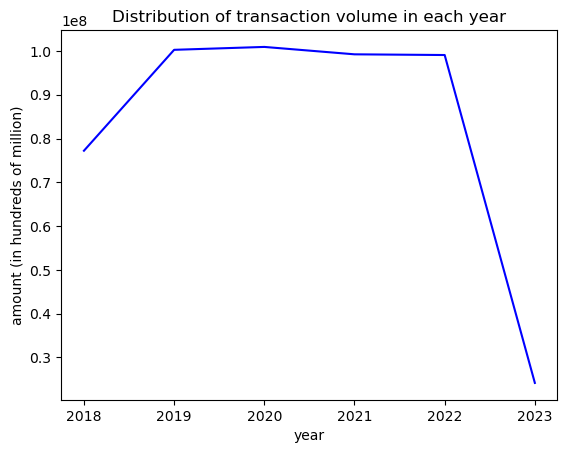

In [451]:
#Distribution of transaction volume in each year
#step 1: define the data
x= df_sum
y= df_sum
#["year"] ["amount"]
#step 2: create a line chart using plot()
plt.plot(df_sum.index, df_sum.values, color = "blue")
plt.xlabel("year")
plt.ylabel("amount (in hundreds of million)")
plt.title("Distribution of transaction volume in each year")
plt.show

In [475]:
#Distribution of the transaction types in each year

df_2020 = df[df["year"]==2020]
df_2020_type = df_2020.groupby("type")["amount"].sum()
print(df_2020_type.head())

df_2021 = df[df["year"]==2021]
df_2021_type = df_2021.groupby("type")["amount"].sum()
print(df_2021_type.head())

df_2022 = df[df["year"]==2022]
df_2022_type = df_2022.groupby("type")["amount"].sum()
print(df_2022_type.head())

df_2023 = df[df["year"]==2023]
df_2023_type = df_2023.groupby("type")["amount"].sum()
print(df_2023_type.head())

type
credit     33,837,229
debit      33,255,455
transfer   33,843,665
Name: amount, dtype: float64
type
credit     32,949,291
debit      32,997,034
transfer   33,298,752
Name: amount, dtype: float64
type
credit     33,366,311
debit      33,098,668
transfer   32,620,008
Name: amount, dtype: float64
type
credit     8,347,726
debit      7,693,130
transfer   8,106,814
Name: amount, dtype: float64


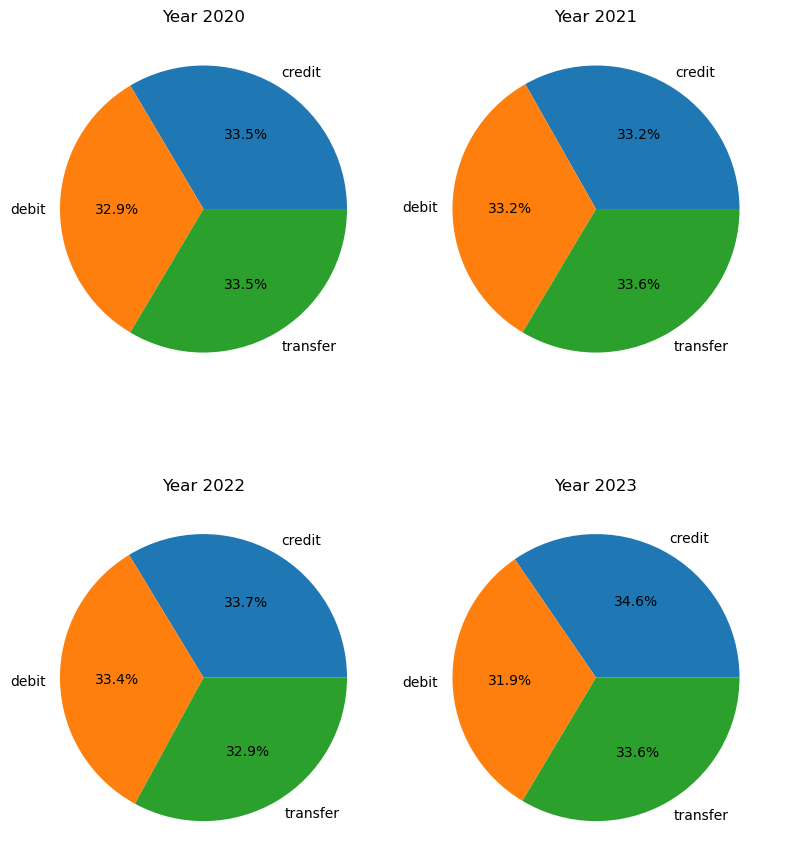

In [497]:
#Distribution of the transaction types in each year (pie chart)

plt.figure(figsize=(8,10))

#pie chart for year 2020
plt.subplot(2,2,1)
plt.pie(df_2020_type, labels=df_2020_type.index, autopct="%1.1f%%")  # Use .index for 'type'
plt.title("Year 2020")

#pie chart for year 2021
plt.subplot(2,2,2)
plt.pie(df_2021_type, labels=df_2021_type.index, autopct="%1.1f%%")  # Use .index for 'type'
plt.title("Year 2021")

#pie chart for year 2022
plt.subplot(2,2,3)
plt.pie(df_2022_type, labels=df_2022_type.index, autopct="%1.1f%%")  # Use .index for 'type'
plt.title("Year 2022")

#pie chart for year 2023
plt.subplot(2,2,4)
plt.pie(df_2023_type, labels=df_2023_type.index, autopct="%1.1f%%")  # Use .index for 'type'
plt.title("Year 2023")

plt.tight_layout()
plt.show()